# **OpenCV Crash Course**

Basic Image Processing technicques including:
*   Read image
*   Image display
*   Image colorspace
*   Color detection
*   Edge detection
*   Shape detection
*   Object detection



**Image display**


> read/show



Uploaded file: colors/colors_1.png


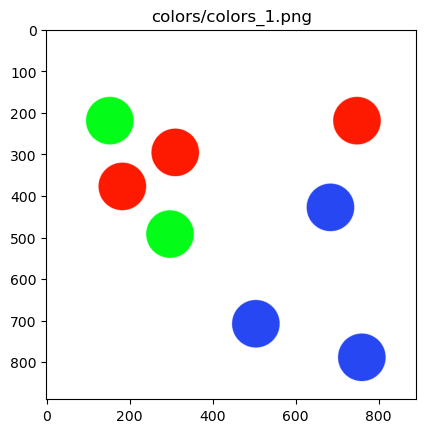

In [2]:
import cv2
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "colors/colors_1.png"
print(f"Uploaded file: {image_path}")

# Load and display the image
image = cv2.imread(image_path)

# Show imaget
plt.imshow(image)
plt.axis('on')
plt.title(image_path)
plt.show()

**Colorspace**

> RGB, HSV, HSL



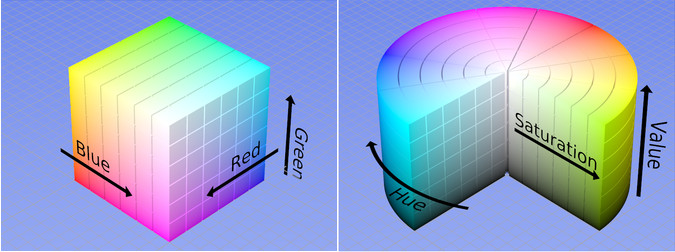

In [3]:
from IPython.display import display
from PIL import Image

# Manually specify the image name
image_path = "colors/colorspace.jpg"

# Open and display the image
img = Image.open(image_path)
display(img)


**Color Conversion**

>BRG->RGB





Uploaded file: colors/colors_1.png


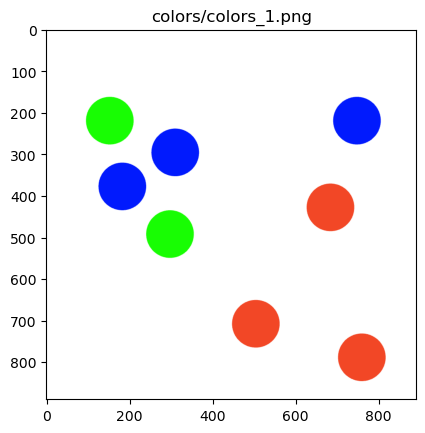

In [4]:
import cv2
import matplotlib.pyplot as plt

# Upload file

# Get the uploaded filename
image_path = "colors/colors_1.png"
print(f"Uploaded file: {image_path}")

# Load and display the image
image = cv2.imread(image_path)

# Opencv by default reads colors as BGR
# Convert BGR to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.imshow(image_rgb)
plt.axis('on')
plt.title(image_path)
plt.show()


**Image Processing**


> Color detection

When detecting colors in images, HSV (Hue, Saturation, Value) is preferred over RGB (Red, Green, Blue) because HSV separates color (hue) from intensity (value), making it more robust to lighting changes.


*   **RGB** values change with brightness, making color detection unreliable under different lighting conditions.
*   **HSV** keeps hue constant even if the brightness (Value) changes.





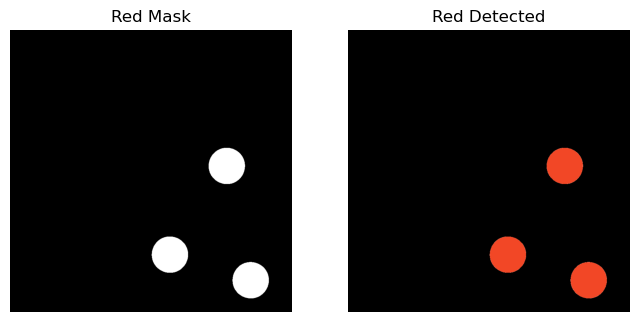

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "colors/colors_1.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV (Hue, Saturation, Value) for color detection
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges in HSV
color_ranges = {
    "Blue": ([100, 100, 50], [140, 255, 255]),
    "Green": ([40, 40, 40], [80, 255, 255]),
    "Red": ([0, 100, 50], [10, 255, 255])
    #"Purple": ([130, 50, 50], [160, 255, 255]),
    #"Pink": ([160, 50, 100], [180, 255, 255])
}

# Function to detect and display colors
def detect_color(color_name, lower, upper):
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Create a mask for the color
    mask = cv2.inRange(image_hsv, lower, upper)

    # Apply mask to the original image
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

    # Display result
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(mask, cmap='gray')
    plt.axis("off")
    plt.title(f"{color_name} Mask")

    plt.subplot(1,2,2)
    plt.imshow(result)
    plt.axis("off")
    plt.title(f"{color_name} Detected")

    plt.show()

# Detect colors
for color, (lower, upper) in color_ranges.items():
    detect_color(color, lower, upper)


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "colors/colors_1.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV (Hue, Saturation, Value) for color detection
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges in HSV
color_ranges = {
    "Blue": ([100, 100, 50], [140, 255, 255]),
    "Green": ([40, 40, 40], [80, 255, 255]),
    "Red": ([0, 100, 50], [10, 255, 255])
}

# Copy the image for drawing bounding boxes
image_with_boxes = image_rgb.copy()

# Function to detect and draw bounding boxes
def detect_and_draw_box(color_name, lower, upper):
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Create a mask for the color
    mask = cv2.inRange(image_hsv, lower, upper)

    # Find contours (shapes) in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around detected contours
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small noise
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image_with_boxes, (x, y), (x+w, y+h), (120, 120, 120), 2)
            cv2.putText(image_with_boxes, color_name, (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 120, 120), 2)

# Detect colors and draw bounding boxes
for color, (lower, upper) in color_ranges.items():
    detect_and_draw_box(color, lower, upper)

# Display the final image with bounding boxes
plt.figure(figsize=(8, 6))
plt.imshow(image_with_boxes)
plt.axis("on")
plt.title("Detected Colors with Bounding Boxes")
plt.show()


**Image Processing**


> Shape detection



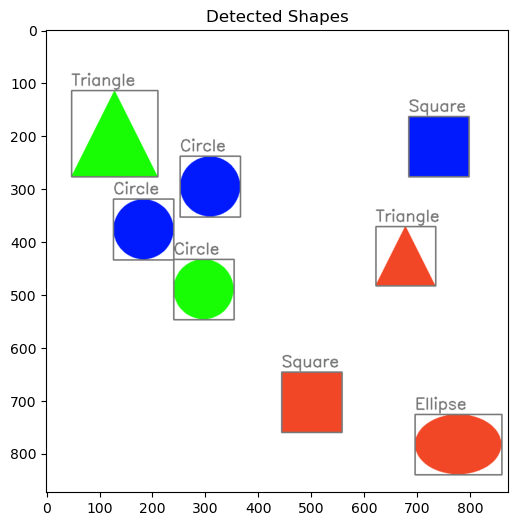

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "shapes/shapes_1.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale for shape detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy image to draw shapes
image_with_shapes = image_rgb.copy()

# Function to classify shapes
def classify_shape(contour):
    shape = "Unknown"
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Shape approximation
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Triangle (3 sides)
    if len(approx) == 3:
        shape = "Triangle"

    # Rectangle or Square (4 sides)
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        if 0.9 <= aspect_ratio <= 1.1:
            shape = "Square"
        else:
            shape = "Rectangle"

    # Ellipse or Circle
    elif len(approx) > 4:
        (x, y), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
        if abs(major_axis - minor_axis) < 10:
            shape = "Circle"
        else:
            shape = "Ellipse"

    return shape

# Detect and label shapes
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter small noise
        shape_name = classify_shape(contour)
        x, y, w, h = cv2.boundingRect(contour)

        # Draw bounding box
        cv2.rectangle(image_with_shapes, (x, y), (x+w, y+h), (120, 120, 120), 2)

        # Put shape label
        cv2.putText(image_with_shapes, shape_name, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 120, 120), 2)

# Display the original image with shape detection
plt.figure(figsize=(8, 6))
plt.imshow(image_with_shapes)
plt.axis("on")
plt.title("Detected Shapes")
plt.show()


**Image processing**


> Area calculation(%)

potential use cases can be for example: measuring the percantage of a material within an area (concrete, green spaces, water, etc...)

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "shapes/shapes_1.png"

# Load the image
image = cv2.imread(image_path)

# Get total image area
image_height, image_width = image.shape[:2]
total_image_area = image_height * image_width

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale for shape detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy image to draw shapes
image_with_shapes = image_rgb.copy()

# Function to classify shapes
def classify_shape(contour):
    shape = "Unknown"
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Shape approximation
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Triangle (3 sides)
    if len(approx) == 3:
        shape = "Triangle"

    # Rectangle or Square (4 sides)
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        if 0.9 <= aspect_ratio <= 1.1:
            shape = "Square"
        else:
            shape = "Rectangle"

    # Ellipse or Circle
    elif len(approx) > 4:
        (x, y), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
        if abs(major_axis - minor_axis) < 10:
            shape = "Circle"
        else:
            shape = "Ellipse"

    return shape

# Dictionary to store shape area percentages
shape_areas = {}

# Detect and label shapes
for contour in contours:
    shape_area = cv2.contourArea(contour)  # Get area of the shape
    if shape_area > 500:  # Filter small noise
        shape_name = classify_shape(contour)
        x, y, w, h = cv2.boundingRect(contour)

        # Compute area percentage
        shape_area_percentage = (shape_area / total_image_area) * 100
        shape_areas[shape_name] = shape_areas.get(shape_name, 0) + shape_area_percentage  # Accumulate areas for same shapes

        # Draw bounding box
        cv2.rectangle(image_with_shapes, (x, y), (x+w, y+h), (120, 120, 120), 2)

        # Put shape label with area percentage
        label = f"{shape_name} ({shape_area_percentage:.2f}%)"
        cv2.putText(image_with_shapes, label, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, (120, 120, 120), 2)

# Display the original image with shape detection
plt.figure(figsize=(8, 6))
plt.imshow(image_with_shapes)
plt.axis("on")
plt.title("Detected Shapes with Area %")
plt.show()

# Print area percentage for each shape
print("Shape Area Percentages:")
for shape, area_percent in shape_areas.items():
    print(f"{shape}: {area_percent:.2f}%")


Shape Area Percentages:
Ellipse: 1.91%
Square: 3.35%
Circle: 3.98%
Triangle: 2.59%


**Image processing**


> Shape and color detection



In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "shapes/shapes_1.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale for shape detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert image to HSV for color detection
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges in HSV
color_ranges = {
    "Blue": ([100, 100, 50], [140, 255, 255]),
    "Green": ([40, 40, 40], [80, 255, 255]),
    "Red": ([0, 100, 50], [10, 255, 255])
}

# Copy image to draw shapes and labels
image_with_shapes = image_rgb.copy()

# Function to classify shapes
def classify_shape(contour):
    shape = "Unknown"
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Shape approximation
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Triangle (3 sides)
    if len(approx) == 3:
        shape = "Triangle"

    # Rectangle or Square (4 sides)
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        if 0.9 <= aspect_ratio <= 1.1:
            shape = "Square"
        else:
            shape = "Rectangle"

    # Ellipse or Circle
    elif len(approx) > 4:
        (x, y), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
        if abs(major_axis - minor_axis) < 10:
            shape = "Circle"
        else:
            shape = "Ellipse"

    return shape

# Function to detect the dominant color inside a contour
def detect_color(contour):
    mask = np.zeros(image_hsv.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Check which color range matches the most
    detected_color = "Unknown"
    max_pixels = 0

    for color_name, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        color_mask = cv2.inRange(image_hsv, lower, upper)

        # Count non-zero pixels inside the shape mask
        overlap = cv2.bitwise_and(color_mask, color_mask, mask=mask)
        pixels = cv2.countNonZero(overlap)

        if pixels > max_pixels:
            max_pixels = pixels
            detected_color = color_name

    return detected_color

# Detect and label shapes with colors
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter small noise
        shape_name = classify_shape(contour)
        color_name = detect_color(contour)

        x, y, w, h = cv2.boundingRect(contour)

        # Draw bounding box
        cv2.rectangle(image_with_shapes, (x, y), (x+w, y+h), (120, 120, 120), 2)

        # Put shape & color label
        label = f"{color_name} {shape_name}"
        cv2.putText(image_with_shapes, label, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (120, 120, 120), 2)

# Display the original image with shape and color detection
plt.figure(figsize=(8, 6))
plt.imshow(image_with_shapes)
plt.axis("on")
plt.title("Detected Shapes & Colors")
plt.show()


**Image processing**


> Edge detection



In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "shapes/shapes_1.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale (edge detection works best in grayscale)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise (helps with edge detection)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)  # Thresholds (50, 150) can be adjusted

# Display original image and edges side by side
plt.figure(figsize=(12, 6))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("on")

# Show detected edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("on")

plt.show()


**Case 1**


> Facades (edge detection)



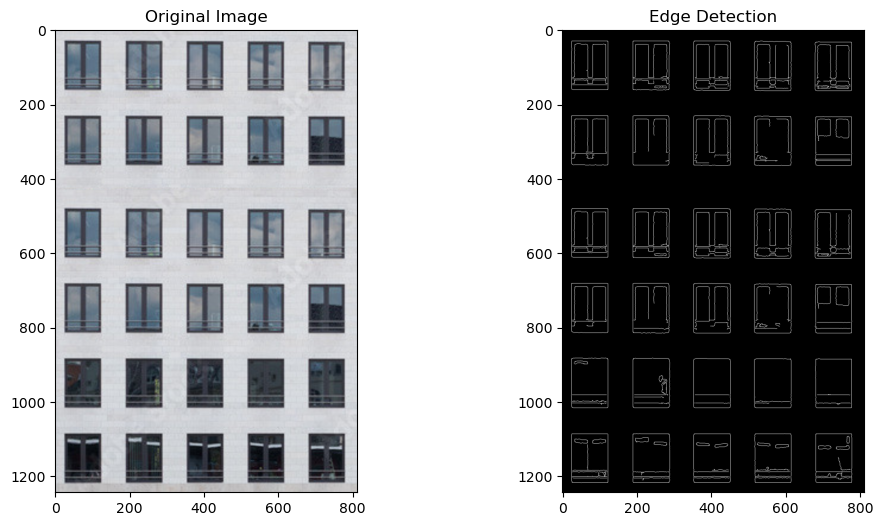

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = "facades/2.png"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale (edge detection works best in grayscale)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Apply Gaussian Blur to reduce noise and smooth the image.
# - Larger kernel (e.g., (9,9)) = more blur, smaller (e.g., (3,3)) = less blur.
# - Helps edge detection by removing minor texture variations.
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection to detect strong intensity changes (edges).
# - Lower threshold (50): Filters weak edges (increase to remove noise).
# - Upper threshold (150): Detects strong edges (decrease to capture finer details).
edges = cv2.Canny(blurred, 50, 150)  # Adjust (e.g., (30,100) or (60,180)) for better results.


# Display original image and edges side by side
plt.figure(figsize=(12, 6))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("on")

# Show detected edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("on")

plt.show()


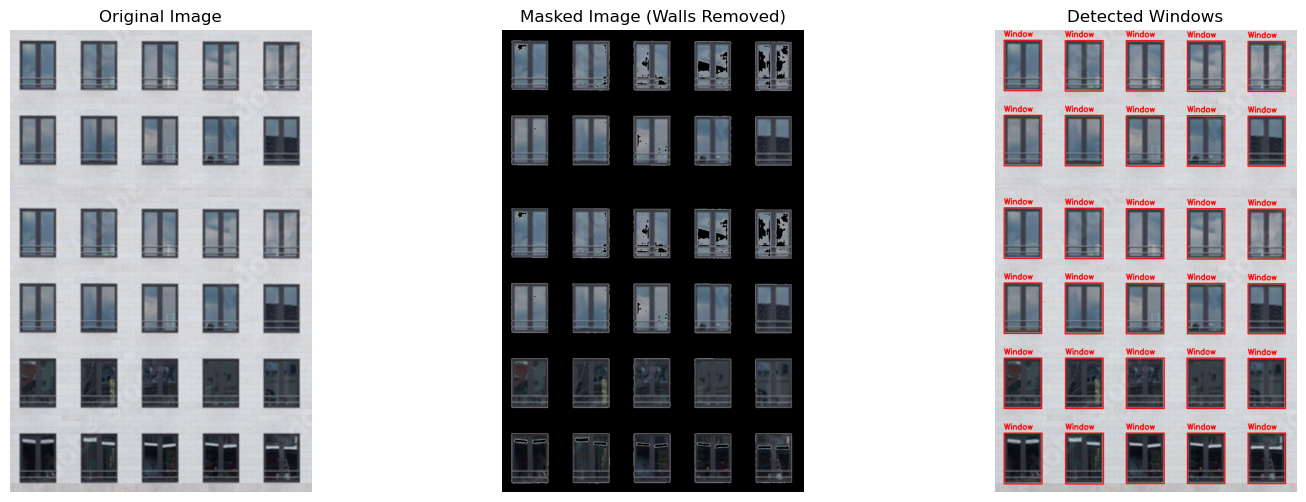

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'facades/2.png'

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV for color-based filtering
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for wall colors (adjust for your image)
wall_lower = np.array([0, 0, 160], dtype="uint8")  # grey/white
wall_upper = np.array([180, 50, 255], dtype="uint8")

# Create a mask to exclude wall areas
wall_mask = cv2.inRange(image_hsv, wall_lower, wall_upper)
non_wall_mask = cv2.bitwise_not(wall_mask)

# Apply mask to remove walls and keep only darker regions (windows)
# This keeps only non-wall areas, removing light-colored walls based on the HSV mask.
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=non_wall_mask)

# Convert the masked image to grayscale
# Edge detection works best in grayscale, as it simplifies the image by removing color information.
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)

# Apply Morphological Transformation to enhance window edges
# Morphological closing (dilation followed by erosion) fills small gaps in detected window edges.
kernel = np.ones((3, 3), np.uint8)  # 3x3 kernel for minor noise reduction
morph = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Apply Canny Edge Detection
# Detects edges by highlighting areas of high intensity change (strong contrasts).
# The two thresholds (50, 150) define which edges are considered strong or weak.
edges = cv2.Canny(morph, 50, 150)

# Find contours
# Contours are the outlines of detected objects (windows) in the edge-detected image.
# RETR_EXTERNAL retrieves only the outermost contours, ignoring nested structures.
# CHAIN_APPROX_SIMPLE compresses the contour points to save memory.
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Copy image for drawing detected windows
image_with_windows = image_rgb.copy()

# Function to filter window-like shapes
def is_window(contour):
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Approximate the contour
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:  # Ensure 4 corners (rectangle)
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)

        # Windows typically have an aspect ratio between 0.5 and 2.0 and should not be too large
        if 0.5 <= aspect_ratio <= 2.0 and 50 < w < 400 and 50 < h < 400:
            return True
    return False

# Detect and draw windows
for contour in contours:
    if cv2.contourArea(contour) > 100 and is_window(contour):  # Filter small objects
        x, y, w, h = cv2.boundingRect(contour)

        # Draw bounding box around detected windows
        cv2.rectangle(image_with_windows, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image_with_windows, "Window", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Display images side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show Original Image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show Masked Image Without Walls
axes[1].imshow(masked_image)
axes[1].set_title("Masked Image (Walls Removed)")
axes[1].axis("off")

# Show Detected Windows
axes[2].imshow(image_with_windows)
axes[2].set_title("Detected Windows")
axes[2].axis("off")

plt.show()


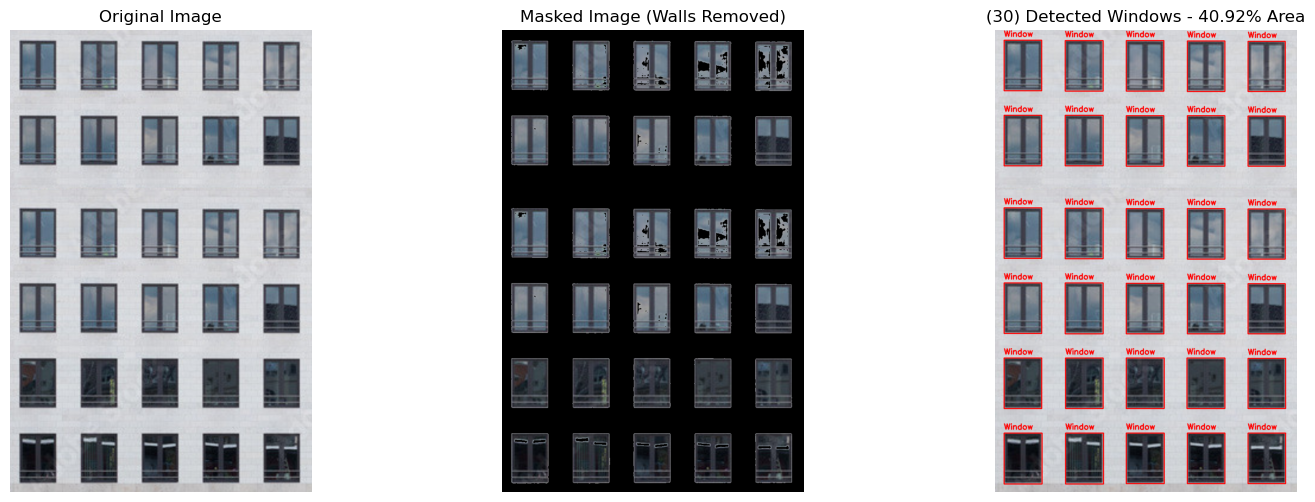

Total Number of Windows Detected: 30
Total Window Area: 40.92% of the Image


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload facade image
image_path = "facades/2.png"

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image size for normalization
img_height, img_width = image.shape[:2]
total_image_area = img_height * img_width  # Total area of the image

# Convert BGR to HSV for color-based filtering
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for wall colors (adjust for your image)
wall_lower = np.array([0, 0, 160], dtype="uint8")  # grey/white
wall_upper = np.array([180, 50, 255], dtype="uint8")

# Create a mask to exclude wall areas
wall_mask = cv2.inRange(image_hsv, wall_lower, wall_upper)
non_wall_mask = cv2.bitwise_not(wall_mask)

# Apply mask to remove walls and keep only darker regions (windows)
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=non_wall_mask)

# Convert the masked image to grayscale
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)

# Apply Morphological Transformation to enhance window edges
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Apply Canny Edge Detection
edges = cv2.Canny(morph, 50, 150)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy image for drawing detected windows
image_with_windows = image_rgb.copy()

# Function to filter window-like shapes
def is_window(contour):
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Approximate the contour
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:  # Ensure 4 corners (rectangle)
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)

        # Windows typically have an aspect ratio between 0.5 and 2.0 and should not be too large
        if 0.5 <= aspect_ratio <= 2.0 and 50 < w < 400 and 50 < h < 400:
            return True
    return False

# Function to count windows and calculate % area
def calculate_window_stats(contours, image_area):
    window_count = 0
    total_window_area = 0

    for contour in contours:
        if cv2.contourArea(contour) > 100 and is_window(contour):  # Filter small objects
            x, y, w, h = cv2.boundingRect(contour)
            window_area = w * h
            total_window_area += window_area
            window_count += 1

            # Draw bounding box around detected windows
            cv2.rectangle(image_with_windows, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(image_with_windows, "Window", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    window_area_percentage = (total_window_area / image_area) * 100  # Calculate % area
    return window_count, window_area_percentage

# Calculate window statistics
window_count, window_area_percentage = calculate_window_stats(contours, total_image_area)

# Display images side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show Original Image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show Masked Image Without Walls
axes[1].imshow(masked_image)
axes[1].set_title("Masked Image (Walls Removed)")
axes[1].axis("off")

# Show Detected Windows
axes[2].imshow(image_with_windows)
axes[2].set_title(f"({window_count}) Detected Windows - {window_area_percentage:.2f}% Area")
axes[2].axis("off")

plt.show()

# Print results
print(f"Total Number of Windows Detected: {window_count}")
print(f"Total Window Area: {window_area_percentage:.2f}% of the Image")


**Case 2**


> Maps




In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'maps/map_1.png'

# Load the image
image = cv2.imread(image_path)

# Resize the image to 500x500
image = cv2.resize(image, (500, 500))

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV for color detection
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for Dark Green detection
color_ranges = {
    "Green": ([35, 50, 30], [85, 255, 100])  # Dark Green Range
}

# Create an empty mask
final_mask = np.zeros_like(image_rgb, dtype=np.uint8)

# Detect and create the mask
for color_name, (lower, upper) in color_ranges.items():
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Create a binary mask for the selected color
    mask = cv2.inRange(image_hsv, lower, upper)

    # Convert mask to 3-channel format for visualization
    mask_colored = np.zeros_like(image_rgb)
    mask_colored[:, :, 1] = mask  # Apply green color for mask visualization

# Display the original image, detected mask, and combined overlay side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show Original Image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show Masked Image (Only Green Areas)
axes[1].imshow(mask_colored)
axes[1].set_title("Detected Green Mask")
axes[1].axis("off")

# Show Overlayed Image (Mask + Original)
overlaid_image = cv2.addWeighted(image_rgb, 0.7, mask_colored, 1, 0)
axes[2].imshow(overlaid_image)
axes[2].set_title("Overlayed Mask")
axes[2].axis("off")

plt.show()



In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename
image_path = 'maps/map_3.png'

# Load the image
image = cv2.imread(image_path)

# Resize the image to 500x500
image = cv2.resize(image, (500, 500))

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV for color detection
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for Dark Green
color_ranges = {
    "Green": ([35, 50, 30], [85, 255, 200])  # Dark Green Range
}

# Create an empty mask
final_mask = np.zeros_like(image_rgb, dtype=np.uint8)

# Detect and overlay mask on the image
for color_name, (lower, upper) in color_ranges.items():
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # Create a binary mask for the selected color
    mask = cv2.inRange(image_hsv, lower, upper)

    # Calculate the percentage of detected area
    total_pixels = image.shape[0] * image.shape[1]  # Total pixels in image
    detected_pixels = np.count_nonzero(mask)  # Count nonzero (detected) pixels
    detected_percentage = (detected_pixels / total_pixels) * 100  # Calculate %

    # Convert mask to 3-channel format for overlay
    mask_colored = np.zeros_like(image_rgb)
    mask_colored[:, :, 1] = mask  # Apply green channel for visualization

    # Overlay the mask on the original image
    overlaid_image = cv2.addWeighted(image_rgb, 0.7, mask_colored, 1, 0)

# Display the original image, detected mask, and combined overlay side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show Original Image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show Masked Image (Only Green Areas)
axes[1].imshow(mask_colored)
axes[1].set_title("Detected Green Mask")
axes[1].axis("off")

# Show Overlayed Image (Mask + Original)
overlaid_image = cv2.addWeighted(image_rgb, 0.7, mask_colored, 1, 0)
axes[2].imshow(overlaid_image)
axes[2].set_title("Overlayed Mask")
axes[2].axis("off")

plt.show()
# Print the detected area percentage
print(f"Percentage of detected green area: {detected_percentage:.2f}%")


Percentage of detected green area: 10.77%



Useful links to open datasets:

https://www.kaggle.com/datasets/balraj98/facades-dataset?select=testA

https://resources.maxar.com/product-samples
